# Lab 1. Basic Text Processing with Python

Note: this is a lab session graded. Complete all exercises and upload to Canvas under **Lab 1: Python basics for text analysis** by no later than 01/18/2023, 11:59 PM

Let's do a quick recap on string processing with Python. For string processing, you should go over this tutorial : https://www.geeksforgeeks.org/python-string/

In [1]:
# Let's start some basic coding

str1 = "Hello, "
str2 = "world!"
result = str1 + str2

print(result)  # Output: Hello, world!

# String length
text = "Python is awesome"
length = len(text)
print(length)  # Output: 17

# String slicing
text = "Python is fun"
sub_string = text[7:9]  # Extracts "is"
print(sub_string)

# String methods
text = "   Python Programming   "
stripped = text.strip()         # Removes leading/trailing whitespace
upper_case = text.upper()       # Converts to uppercase
lower_case = text.lower()       # Converts to lowercase
replaced = text.replace("P", "C")  # Replaces "P" with "C"

# String joining
words = ['Python', 'is', 'awesome']
sentence = ' '.join(words)
print(sentence)  # Output: "Python is awesome"

# String Formatting
name = "Alice"
age = 30
message = "My name is {} and I am {} years old.".format(name, age)
print(message)

# Searching in String

text = "Python is powerful"
if "powerful" in text:
    print("Substring found")


Hello, world!
17
is
Python is awesome
My name is Alice and I am 30 years old.
Substring found


### Lists from strings, and hashing strings in dictionary

In [2]:
sentence = "Python is great for programming"
word_list = sentence.split()
print(word_list)  # Output: ['Python', 'is', 'great', 'for', 'programming']

#list slicing

print (word_list[:4])

import json

json_string = '{"name": "Bob", "age": 30, "city": "London"}'
data_dict = json.loads(json_string)
print(data_dict)  # Output: {'name': 'Bob', 'age': 30, 'city': 'London'}


['Python', 'is', 'great', 'for', 'programming']
['Python', 'is', 'great', 'for']
{'name': 'Bob', 'age': 30, 'city': 'London'}


## Exercise E1. Processing wikipedia text

- Implement a function for scraping a website using the BeautifulSoup library. You can refer to the code here
```
https://stackoverflow.com/questions/1936466/how-to-scrape-only-visible-webpage-text-with-beautifulsoup
```
- Extract all text from the website https://en.wikipedia.org/wiki/Natural_language_processing, store it in a variable.

- Extract all words from the paragraph using split() method. Try to remove words that are too common (also known as StopWords) (E.g., `is`, `are`, `of`, `a`, in general articles, prepositions, auxiliary verbs etc)  You can define a list of such common words manually and remove them (example given below).

```
stop_words = ["the", "and", "in", "to", "of", "a", "is", "it", "for", "on"]

```

- Now, after removing redundant words, make a dictionary of frequency of words. e.g. {"language": 5, "processing": 10}

- Print a ranked order of words by sorting the dictionary. Print the ranked order

- Create a bar graph showing words in the x-axis and frequeny in the y axis using `matplotlib`. You can take help of the reference below:

```
https://stackoverflow.com/questions/64684351/plotting-a-bar-chart-of-sorted-word-frequencies
```

- A better understanding of emphasis of words can be attained by plotting WordClouds (Reference: https://en.wikipedia.org/wiki/Tag_cloud). Make a word cloud from the frequency dictionary that you built.

  You can use the following snippet to install and import the WordCloud package.

  ```
  !pip install WordCloud
  from wordcloud import WordCloud
  ```

  Check this solution here and figure out how to plot word clouds from frequencies. You can copy paste the code from the website as long as you give proper attribution in a Markdown block.

  ```
  https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
  ```
- Write down your observations in a mark down block.



In [3]:
pip install bs4

In [4]:
# from that post mentioned
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request

In [5]:
# scrape the wikipedia article and store it in a text variable de_text
def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)
    return u" ".join(t.strip() for t in visible_texts)

html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing').read()
de_text = text_from_html(html)
de_text

<ipython-input-5-0ab5dc952f5f>:12: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  texts = soup.findAll(text=True)


'    Jump to content         Main menu       Main menu  move to sidebar  hide    Navigation    Main page Contents Current events Random article About Wikipedia Contact us Donate      Contribute    Help Learn to edit Community portal Recent changes Upload file       Languages   Language links are at the top of the page.                     Search             Search                               Create account   Log in          Personal tools        Create account  Log in      Pages for logged out editors learn more     Contributions Talk                              Contents  move to sidebar  hide      (Top)       1 History     Toggle History subsection       1.1 Symbolic NLP (1950s – early 1990s)         1.2 Statistical NLP (1990s–2010s)         1.3 Neural NLP (present)           2 Approaches: Symbolic, statistical, neural networks     Toggle Approaches: Symbolic, statistical, neural networks subsection       2.1 Statistical approach         2.2 Neural networks           3 Common NLP t

In [37]:
# Split the text & try to remove stop words
split_text = de_text.split()
stop_words = ["the", "The", "as", "and", "in", "to", "of", "a", "is", "it", "for", "on", ".", "^", ",", ":", "(", ")", "[", "]", "{", "}"] # added common punctuation

for word in list(split_text):
  if word in stop_words:
    split_text.remove(word)

In [38]:
# make a dictionary of the frequency of the words
freq_list = {} # make dict
for word in split_text: # for each word in the split text
    if word in freq_list: # if in then add to the value of the word 1
        freq_list[word] += 1
    else:
        freq_list[word] = 1 # the word is put in and the value is set to 1 (eg. "Langauge": 1)

print(freq_list)

{'Jump': 1, 'content': 5, 'Main': 3, 'menu': 2, 'move': 3, 'sidebar': 3, 'hide': 3, 'Navigation': 1, 'page': 3, 'Contents': 2, 'Current': 1, 'events': 1, 'Random': 1, 'article': 3, 'About': 2, 'Wikipedia': 3, 'Contact': 2, 'us': 1, 'Donate': 1, 'Contribute': 1, 'Help': 1, 'Learn': 1, 'edit': 23, 'Community': 1, 'portal': 1, 'Recent': 1, 'changes': 3, 'Upload': 2, 'file': 2, 'Languages': 1, 'Language': 31, 'links': 5, 'are': 28, 'at': 14, 'top': 2, 'page.': 1, 'Search': 2, 'Create': 2, 'account': 2, 'Log': 2, 'Personal': 1, 'tools': 2, 'Pages': 1, 'logged': 1, 'out': 2, 'editors': 1, 'learn': 3, 'more': 13, 'Contributions': 1, 'Talk': 2, '(Top)': 1, '1': 7, 'History': 4, 'Toggle': 6, 'subsection': 4, '1.1': 1, 'Symbolic': 3, 'NLP': 37, '(1950s': 2, '–': 7, 'early': 5, '1990s)': 3, '1.2': 1, 'Statistical': 6, '(1990s–2010s)': 2, '1.3': 1, 'Neural': 9, '(present)': 2, '2': 4, 'Approaches:': 3, 'Symbolic,': 3, 'statistical,': 3, 'neural': 17, 'networks': 8, '2.1': 1, 'approach': 10, '2.2':

code for dictionary sorting from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [39]:
# sort the dictionary and print greatest to least
sorted_list = list(sorted(freq_list.items(), key=lambda item: item[1], reverse=True))
print(sorted_list[:10])

[('language', 64), ('with', 39), ('NLP', 37), ('that', 36), ('or', 35), ('natural', 32), ('Language', 31), ('processing', 29), ('by', 29), ('are', 28)]


Code for graph from https://stackoverflow.com/questions/64684351/plotting-a-bar-chart-of-sorted-word-frequencies

<Axes: >

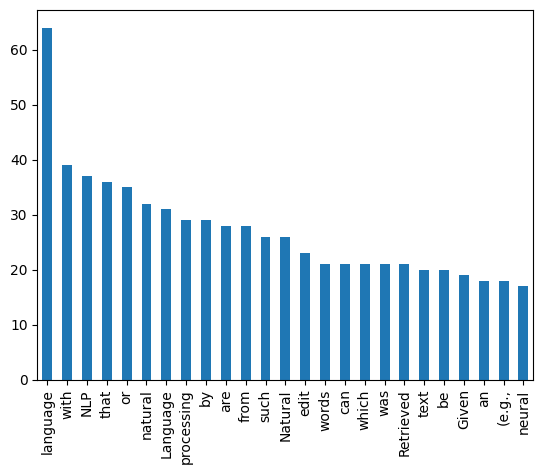

In [40]:
# make a graph!

# first make my sorted list a dict
sorted_dict = dict(sorted_list[:25])
# using pandas
import pandas as pd

# from the post linked here:
pd.Series(sorted_dict).sort_values(ascending=False).plot.bar()

In [41]:
# install wordcloud!
!pip install WordCloud
from wordcloud import WordCloud

Code for WorldCloud from https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python

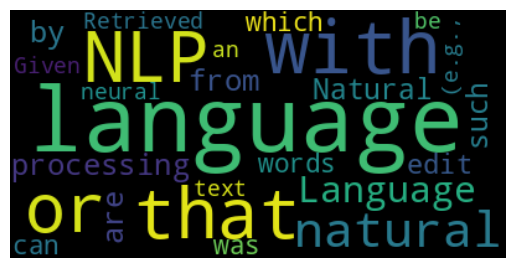

In [42]:
import matplotlib.pyplot as plt
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=sorted_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Pretty Cool Wordcloud

### Observations

I noticed that the most popular word by far was "Langauge", which makes sense because it is a Language-focued wikipedia article. Beyond that, NLP & Natural were two of the bigger ones, as well as processing, words, and others. I also noticed that the stop words list does not cover capital letters, which may be an error on my part or others, idk.

## [Optional] E2. Repeat E1 for the chinese page https://zh.wikipedia.org/wiki/%E8%BE%B2%E6%9B%86

  What additional challenges did you face while processing Chinese text?

  Bro its chinese I can't read that